In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from scipy.stats import skew, kurtosis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [20]:
df =pd.read_csv('/Users/aimaldastagirzada/Downloads/Churn_Modelling.csv')

In [21]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [22]:
df.drop(columns='RowNumber', axis = 0, inplace=True)

In [23]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [25]:
df.describe(include='all')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [26]:
numerical_columns= []

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

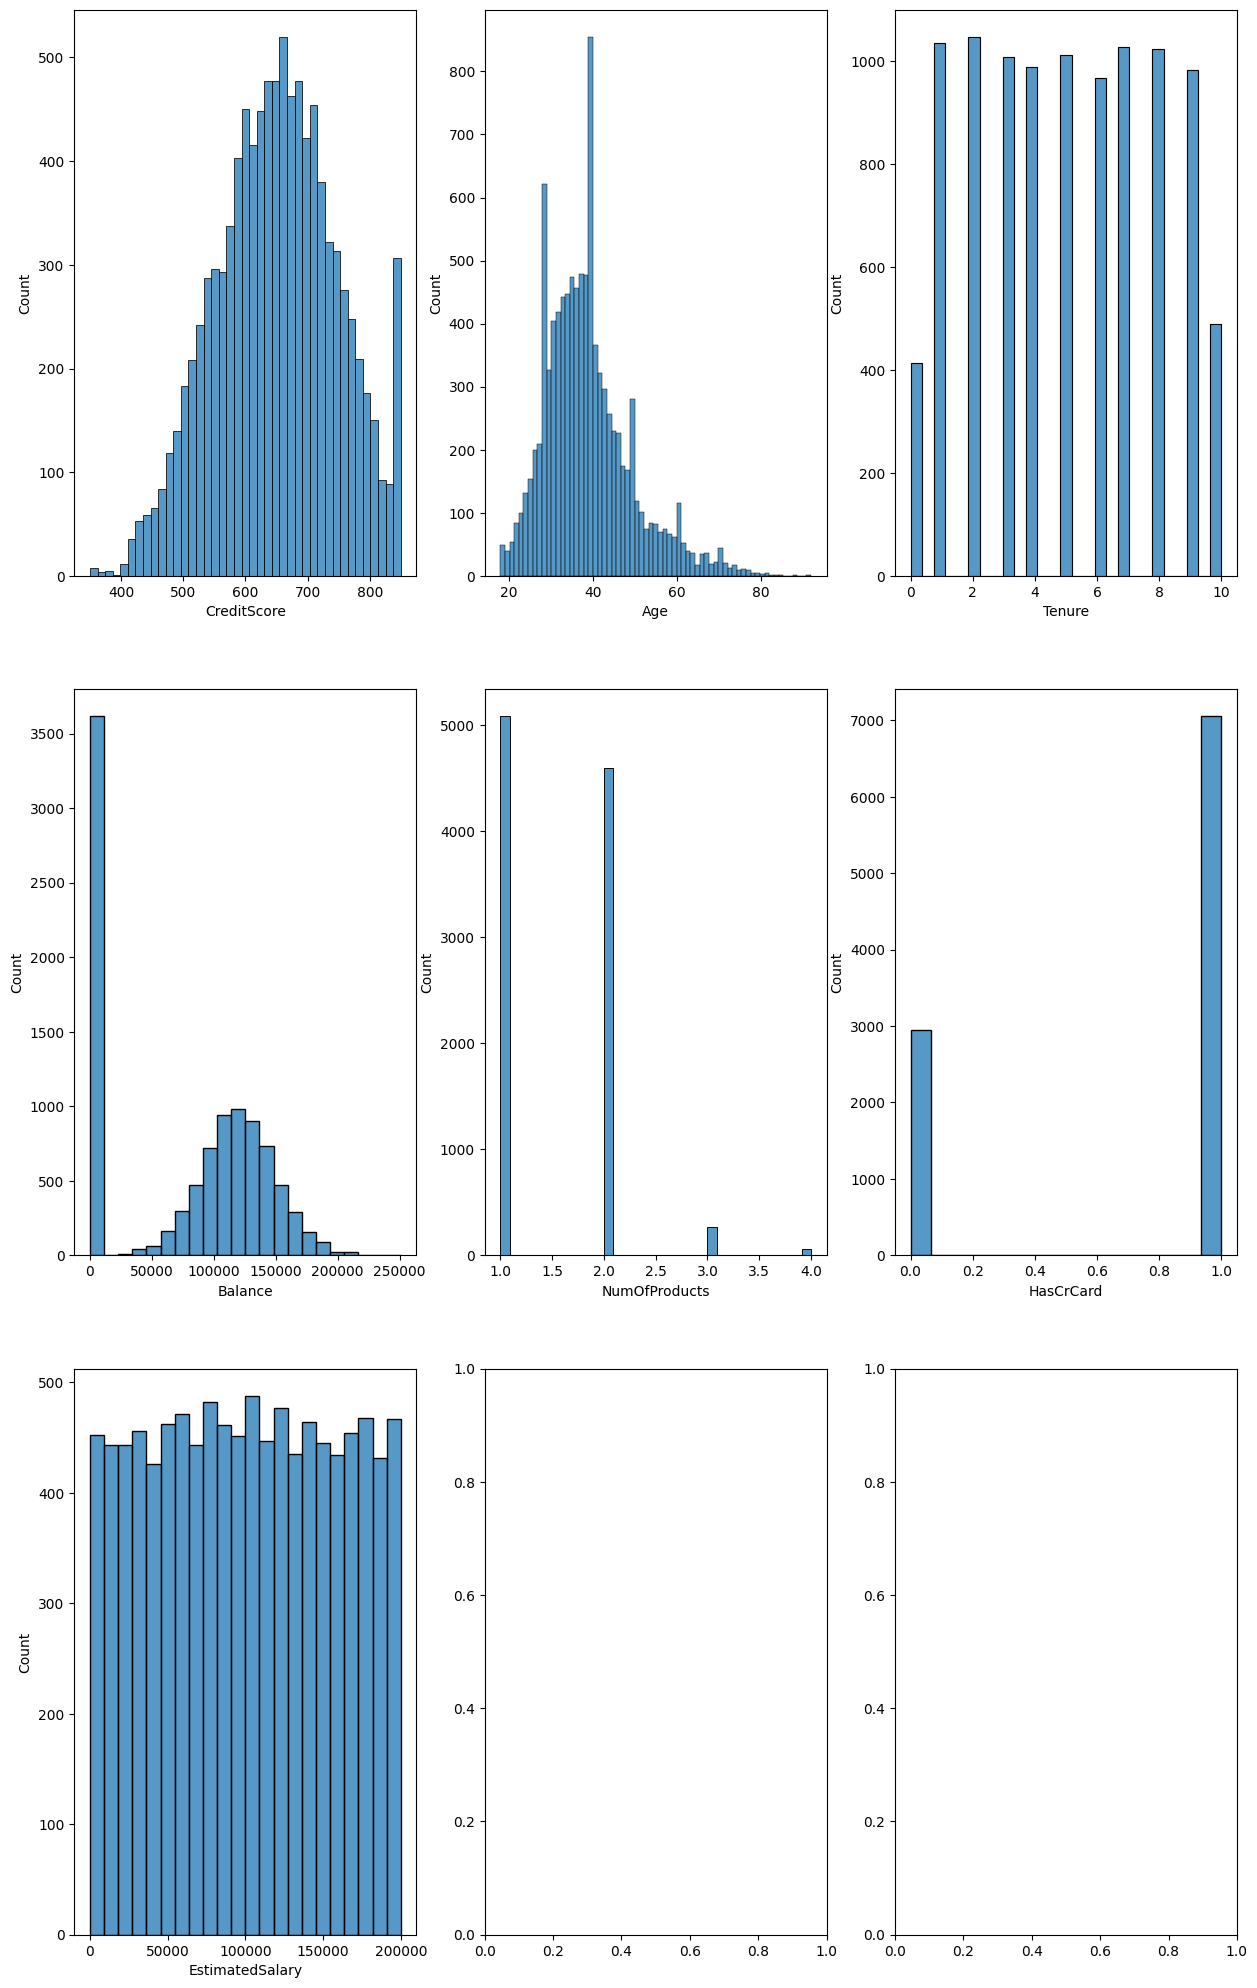

In [27]:
fig, axs = plt.subplots(3,3, figsize=(15,25))
sns.histplot(df['CreditScore'], ax=axs[0][0])
sns.histplot(df['Age'], ax=axs[0][1])
sns.histplot(df['Tenure'], ax=axs[0][2])
sns.histplot(df['Balance'], ax=axs[1][0])
sns.histplot(df['NumOfProducts'], ax=axs[1][1])
sns.histplot(df['HasCrCard'], ax=axs[1][2])
sns.histplot(df['EstimatedSalary'], ax=axs[2][0])



<Axes: >

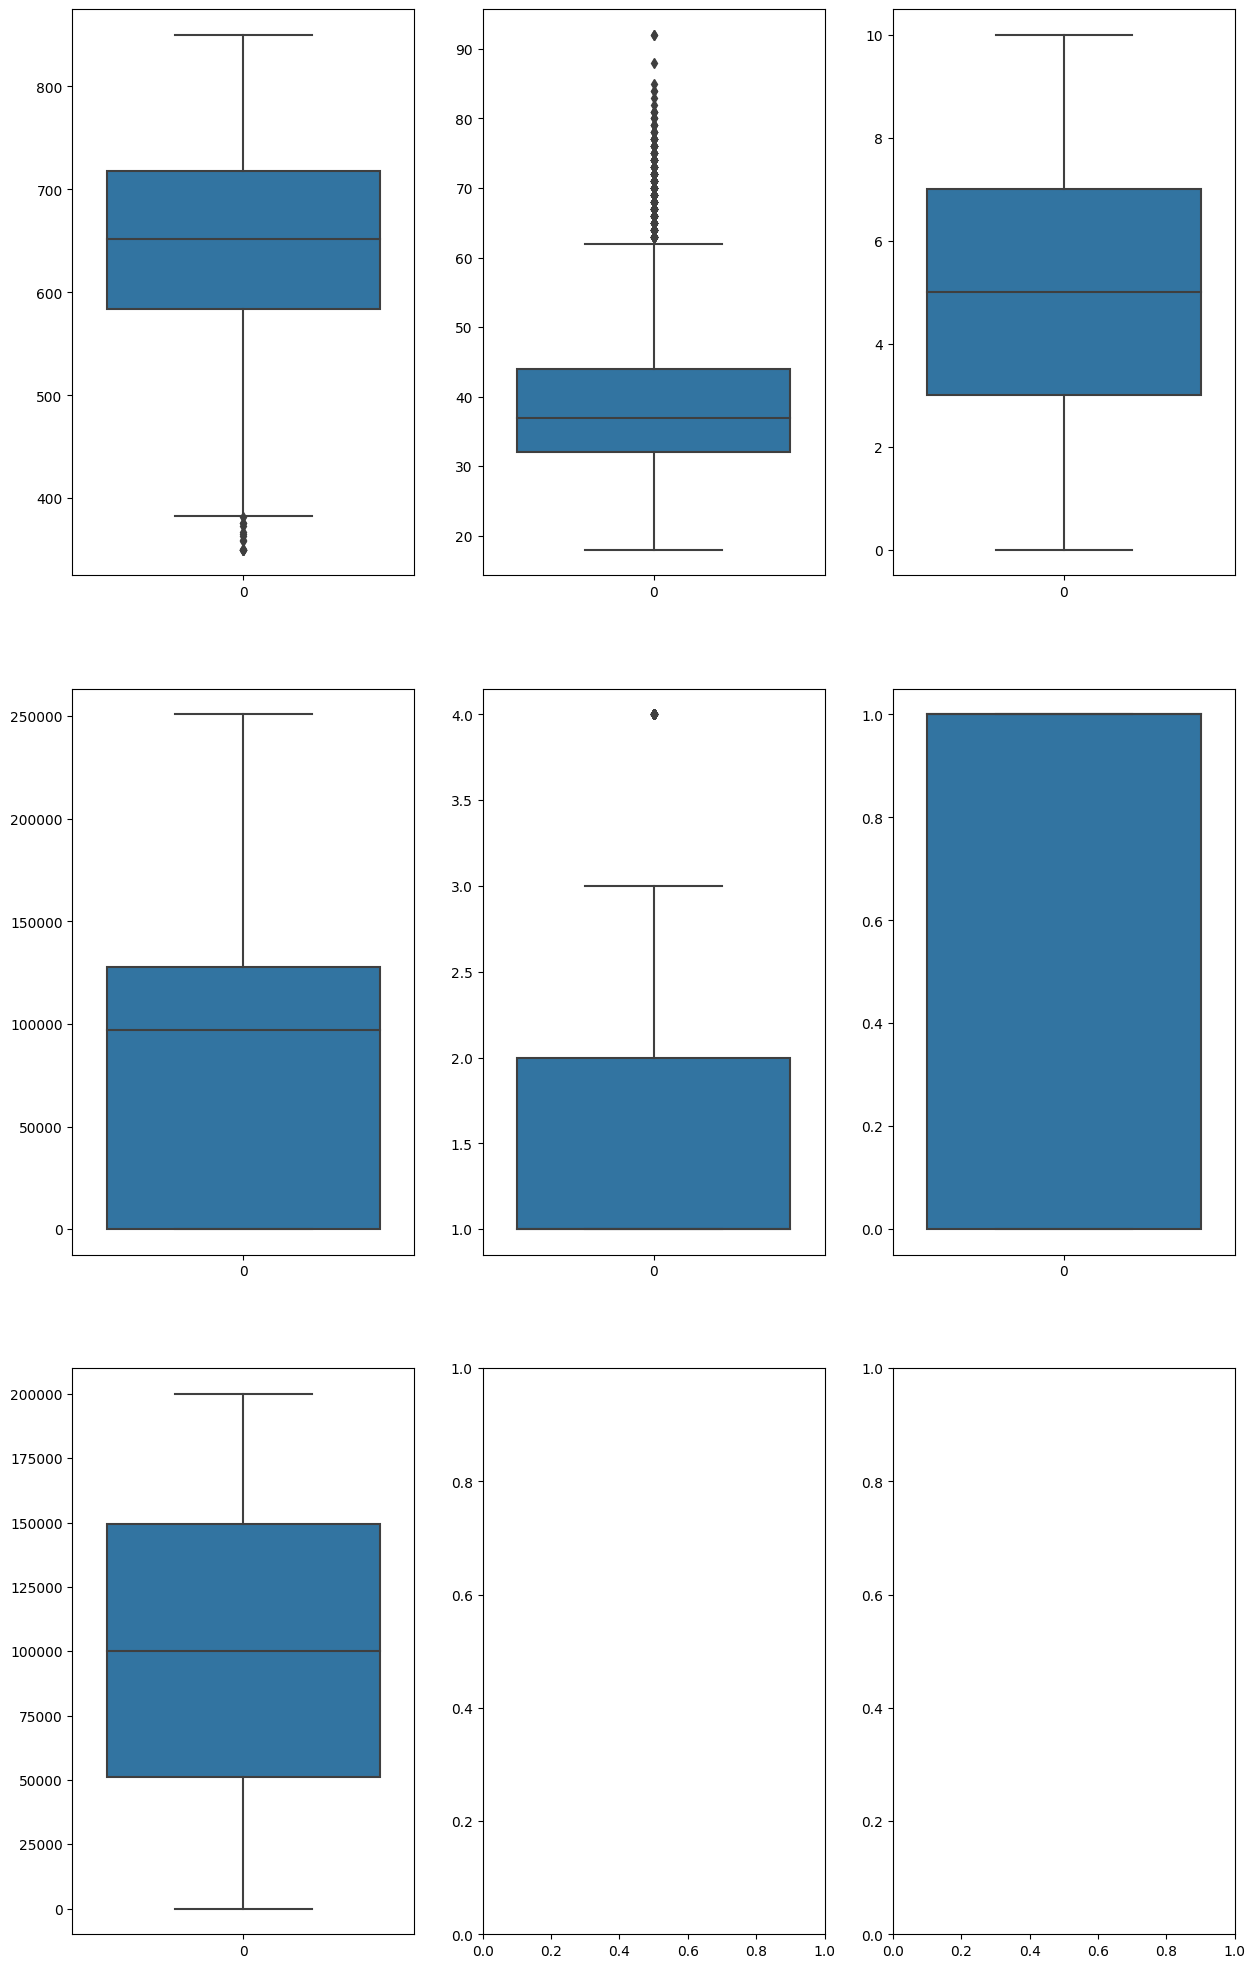

In [28]:
fig, axs = plt.subplots(3,3, figsize=(15,25))
sns.boxplot(df['CreditScore'], ax=axs[0][0])
sns.boxplot(df['Age'], ax=axs[0][1])
sns.boxplot(df['Tenure'], ax=axs[0][2])
sns.boxplot(df['Balance'], ax=axs[1][0])
sns.boxplot(df['NumOfProducts'], ax=axs[1][1])
sns.boxplot(df['HasCrCard'], ax=axs[1][2])
sns.boxplot(df['EstimatedSalary'], ax=axs[2][0])

In [29]:
df=df[df['Age']<70]

In [30]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

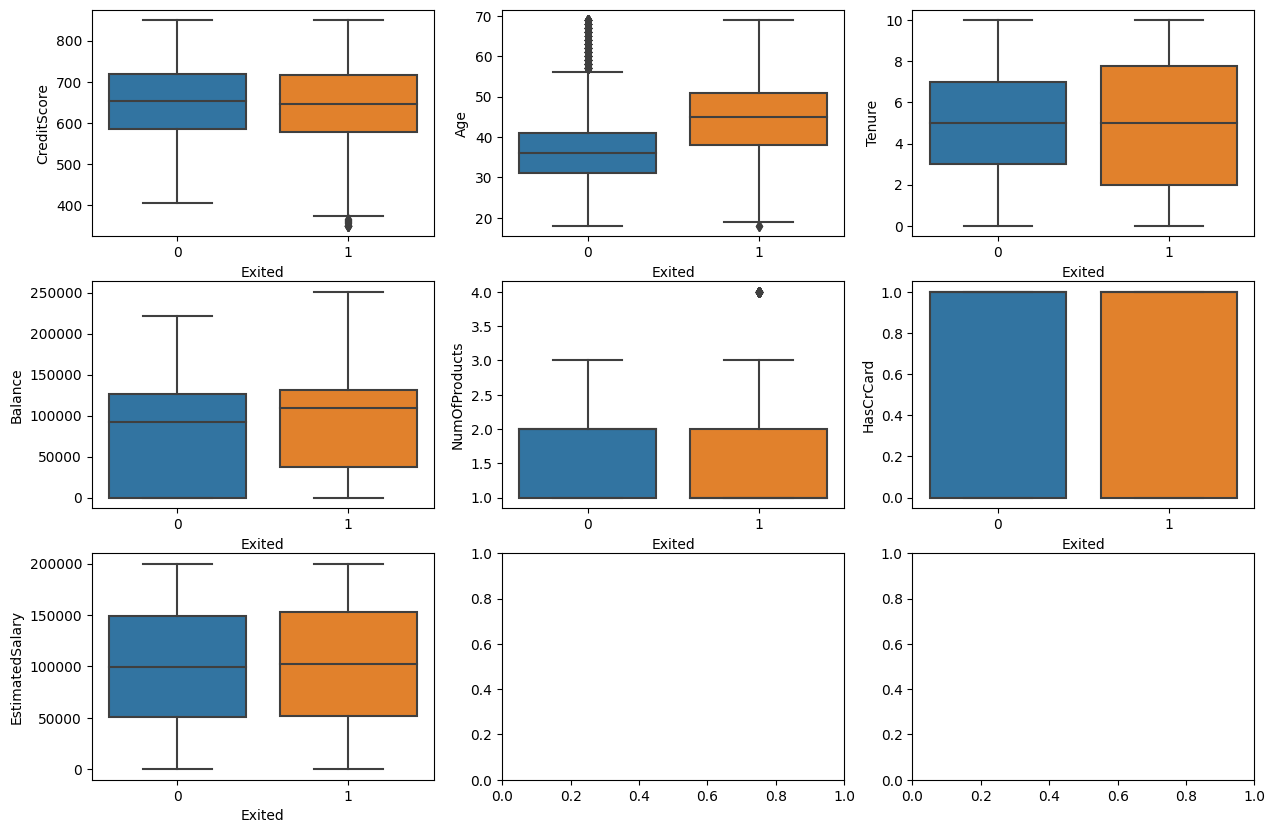

In [43]:
fig, axs = plt.subplots(3,3, figsize=(15,10))
sns.boxplot(x='Exited', y='CreditScore', data=df, ax=axs[0][0])
sns.boxplot(x='Exited', y='Age', data=df, ax=axs[0][1])
sns.boxplot(x='Exited', y='Tenure', data=df, ax=axs[0][2])
sns.boxplot(x='Exited', y='Balance', data=df, ax=axs[1][0])
sns.boxplot(x='Exited', y='NumOfProducts', data=df, ax=axs[1][1])
sns.boxplot(x='Exited', y='HasCrCard', data=df, ax=axs[1][2])
sns.boxplot(x='Exited', y='EstimatedSalary', data=df, ax=axs[2][0])



Age and Tenture might be strong perdictors

In [32]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [34]:
df.groupby(['Geography', 'Exited'])['CustomerId'].count().unstack()


Exited,0,1
Geography,,
France,4132,804
Germany,1662,808
Spain,2033,410


In [35]:
df.groupby(['Gender', 'Exited'])['CustomerId'].count().unstack()

Exited,0,1
Gender,,
Female,3339,1128
Male,4488,894


In [50]:
new_df= df['Geography','Gender','Age','CreditScore']

KeyError: ('Geography', 'Gender', 'Age', 'CreditScore')

In [44]:
cat_column = ['Geography', 'Gender']

In [51]:
num_column = ['Age', 'CreditScore']
target = 'Exited'

In [46]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_column),
                                                 ('num', num_transformer, num_column)])


In [53]:
X_train, X_test, y_train, y_test = train_test_split(df[cat_column + num_column], df[target], test_size=0.2, random_state=123)


In [54]:
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [55]:
x_train_transformed.shape

(7879, 7)

In [56]:
x_test_transformed.shape

(1970, 7)

In [58]:
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_column)

In [59]:
encoded_columns = encoded_columns.tolist()

In [61]:
all_feat = num_column + encoded_columns

X_train_transformed = pd.DataFrame(x_train_transformed, columns=all_feat)
X_test_transformed = pd.DataFrame(x_test_transformed, columns=all_feat)

In [62]:
log = LogisticRegression()
knn = KNeighborsClassifier()
nb = GaussianNB()
svc = SVC()
dt = DecisionTreeClassifier()

In [64]:
log.fit(X_train_transformed,y_train)
knn.fit(X_train_transformed,y_train)
nb.fit(X_train_transformed,y_train)
svc.fit(X_train_transformed, y_train)
dt.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [65]:
pred_l =log.predict(X_test_transformed)
pred_knn= knn.predict(X_test_transformed)
pred_nb= nb.predict(X_test_transformed)
pred_svc= svc.predict(X_test_transformed)
pred_dt= dt.predict(X_test_transformed)

In [66]:
print(f1_score(pred_l, y_test))
print(f1_score(pred_nb, y_test))
print(f1_score(pred_knn, y_test))
print(f1_score(pred_svc, y_test))
print(f1_score(pred_dt, y_test))

0.25177304964539005
0.37837837837837834
0.3964757709251101
0.26763110307414106
0.3920099875156055


In [67]:
print(accuracy_score(pred_l, y_test))
print(accuracy_score(pred_nb, y_test))
print(accuracy_score(pred_knn, y_test))
print(accuracy_score(pred_svc, y_test))
print(accuracy_score(pred_dt, y_test))

0.7857868020304568
0.7781725888324873
0.7913705583756345
0.7944162436548223
0.7527918781725889


In [68]:
print(precision_score(pred_l, y_test))
print(precision_score(pred_nb, y_test))
print(precision_score(pred_knn, y_test))
print(precision_score(pred_svc, y_test))
print(precision_score(pred_dt, y_test))

0.16397228637413394
0.3071593533487298
0.3117782909930716
0.17090069284064666
0.3625866050808314


In [69]:

print(recall_score(pred_l, y_test))
print(recall_score(pred_nb, y_test))
print(recall_score(pred_knn, y_test))
print(recall_score(pred_svc, y_test))
print(recall_score(pred_dt, y_test))

0.5419847328244275
0.4925925925925926
0.5443548387096774
0.6166666666666667
0.4266304347826087


In [70]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [50, 100, 200]
}
rs_log = RandomizedSearchCV(log, param_distributions=param_grid, cv=10)
rs_log.fit(x_train_transformed,y_train)
rs_log.best_estimator_

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

LogisticRegression(C=0.1, max_iter=200, penalty='l1', solver='liblinear')

In [74]:
log_best = LogisticRegression(C=0.1,max_iter=200,penalty='l1',solver='liblinear')

log_best.fit(x_train_transformed,y_train)
pred_best_log = log_best.predict(x_test_transformed)
cv_scores = cross_val_score(log_best, x_train_transformed, y_train, cv=10, scoring='accuracy')
print("Cross-validation scores for Logistic Regression: ", cv_scores)

Cross-validation scores for Logistic Regression:  [0.80583756 0.81218274 0.81345178 0.79822335 0.81472081 0.80203046
 0.79441624 0.79314721 0.80329949 0.80050826]


In [75]:
svc_params = {'kernel':['linear','poly','rbf']}

rs_svc = RandomizedSearchCV(svc, svc_params, n_iter=3, cv=5, scoring='recall')
rs_svc.fit(X_train_transformed, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=3,
                   param_distributions={'kernel': ['linear', 'poly', 'rbf']},
                   scoring='recall')

In [76]:
svc_best = SVC()
svc_best.fit(X_train_transformed,y_train)
pred_svc_best = svc_best.predict(X_test_transformed)
print(recall_score(pred_svc_best, y_test))

0.6166666666666667


In [78]:
cv_scores = cross_val_score(svc_best, x_train_transformed, y_train, cv=10, scoring='accuracy')
print("Cross-validation scores for SVC: ", cv_scores)

Cross-validation scores for SVC:  [0.81852792 0.81852792 0.82741117 0.81979695 0.82614213 0.8248731
 0.81218274 0.80837563 0.81091371 0.80813215]


In [79]:
dt = DecisionTreeClassifier(random_state=123)
dt = dt.fit(X_train_transformed, y_train)

In [80]:
dt = DecisionTreeClassifier()

In [81]:
dt_params = {'criterion':['gini','entropy','log_loss'],
             'splitter': ['best','random'],
             'max_depth':range(5,20),
             'min_samples_split':range(5,20),
             'min_samples_leaf':range(5,20),
             }

rs_dt = RandomizedSearchCV(dt, dt_params, n_iter=3, cv=5, scoring='accuracy')
rs_dt.fit(X_train_transformed, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=3,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(5, 20),
                                        'min_samples_leaf': range(5, 20),
                                        'min_samples_split': range(5, 20),
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [83]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier


In [90]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_transformed, y_train)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_transformed, y_train)

LogisticRegression(random_state=42)

In [91]:
rf_importance = rf_model.feature_importances_
print(f"Random Forest Feature Importance: {rf_importance}")

# Logistic Regression feature importance (coefficients)
lr_importance = lr_model.coef_
print(f"Logistic Regression Coefficients: {lr_importance}")

Random Forest Feature Importance: [0.00699455 0.02404027 0.00508642 0.00636061 0.00504096 0.3227033
 0.62977389]
Logistic Regression Coefficients: [[-0.30496393  0.6434302  -0.33865586  0.25944814 -0.25963774  0.79167645
  -0.0782034 ]]


In [94]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [95]:
feature_names = ['Age', 'CreditScore', 'Gender', 'Geography']

In [97]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train_transformed, feature_names=df.feature_names, class_names=df.target_names, discretize_continuous=True)

# Explain a prediction (Random Forest)
i = np.random.randint(0, X_test.shape[0])
exp = explainer.explain_instance(X_test[i], rf_model.predict_proba, num_features=4)
exp.show_in_notebook()

AttributeError: 'DataFrame' object has no attribute 'feature_names'